# USING DEEPFACE LIBRARY

In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [3]:
pip install deepface

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 509.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.3 MB 2.2 MB/s eta 0:00:01
     ---- ----------------------------------- 0.2/2.3 MB 2.4 MB/s eta 0:00:01
     -------- ------------------------------- 0.5/2.3 MB 3.8 MB/s eta 0:00:01
     ------------- -------------------------- 0.8/2.3 MB 4.2 MB/s eta 0:00:01
     --------------------- ------------------ 1.2/2.3 MB 5.1 MB/s eta 0:00:01
     --------------------- ------------------ 1.2/2.3 MB 5.1 MB/s eta 0:00:01
     -------------------------------- ------- 1.9/2.3 MB 5.6 MB/s eta 0:00:01
     ------------------------------------- -- 2.1/2.3 MB 5.7 MB/s eta 0:00:01
     --

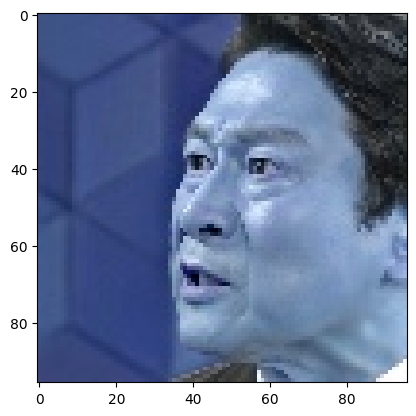

In [28]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("image0000213.jpg")

# Check if the image was read successfully
if img is None:
    print("Error: Unable to read the image.")
else:
    # Convert the image data type if needed
    if img.dtype != 'uint8':
        img = img.astype('uint8')

    # Display the image
    plt.imshow(img)
    plt.show()


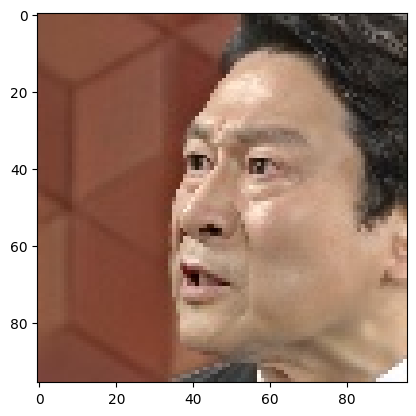

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
pred=DeepFace.analyze(img)


24-01-23 21:30:16 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\manju\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:00<00:00, 6.69MB/s]


24-01-23 21:30:22 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\manju\.deepface\weights\age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 539M/539M [03:08<00:00, 2.86MB/s]


24-01-23 21:33:35 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\manju\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [04:28<00:00, 2.00MB/s]


24-01-23 21:38:12 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\manju\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [04:04<00:00, 2.20MB/s]
Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.37s/it]


In [6]:
pred

[{'emotion': {'angry': 14.108584629465982,
   'disgust': 0.013686076095963139,
   'fear': 67.02952777987387,
   'happy': 0.12489886396838856,
   'sad': 16.239617319152675,
   'surprise': 1.9428886019720313,
   'neutral': 0.5407881278350201},
  'dominant_emotion': 'fear',
  'region': {'x': 13, 'y': 10, 'w': 78, 'h': 78},
  'face_confidence': 4.226982147840317,
  'age': 54,
  'gender': {'Woman': 0.330538977868855, 'Man': 99.6694564819336},
  'dominant_gender': 'Man',
  'race': {'asian': 98.29326888403071,
   'indian': 0.34147853151964763,
   'black': 0.005169175094548229,
   'white': 0.8534729394646955,
   'middle eastern': 0.003938907942683235,
   'latino hispanic': 0.5026657000731587},
  'dominant_race': 'asian'}]

In [10]:
d=pred[0]
d1=d['dominant_emotion']
d1


'fear'

In [13]:
d1 = ['fear', 'surprise', 'shock', 'sad', 'disgust']

if any(emotion in d1 for emotion in ['fear', 'surprise', 'shock', 'sad', 'disgust']):
    print("Stress detected")
else:
    print("Stress not detected")

Stress detected


In [5]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
box = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
                            
while True:                    
                            
     ret, frame = cap.read()
     res = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     faces = box.detectMultiScale(gray, 1.1, 4)
     d = res[0]
     d1 = d['dominant_emotion']
     for (x, y, w, h) in faces:
         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), 2)
     text = cv2.FONT_HERSHEY_SIMPLEX
     cv2.putText(frame, d1, (0, 50), text, 1, (0, 0, 0), 2, cv2.LINE_4)
     cv2.imshow('original video', frame)
     if cv2.waitKey(1) & 0xFF == ord("q"):
         break
cap.release()
cv2.destroyAllWindows()


In [6]:
import cv2
from deepface import DeepFace

# Load the Haar cascade for face detection
box = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Initialize emotion count dictionary
emotion_count = {'angry': 0, 'disgust': 0, 'fear': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'neutral': 0}

while True:                    
    ret, frame = cap.read()
    
    # Analyze the emotions in the frame
    res = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = box.detectMultiScale(gray, 1.1, 4)
    
    # Update emotion count
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), 2)
        d = res[0]
        d1 = d['dominant_emotion']
        emotion_count[d1] += 1
    
    # Display the frame with emotion text
    text = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, d1, (0, 50), text, 1, (0, 0, 0), 2, cv2.LINE_4)
    cv2.imshow('original video', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Determine if stress is detected based on the occurrence of negative emotions
negative_emotions = ['angry', 'disgust', 'fear', 'sad']
total_negative = sum(emotion_count[emotion] for emotion in negative_emotions)
if total_negative > 0:
    print("Stress is detected")
else:
    print("Stress is not detected")

# Release the webcam and close the windows
cap.release()
cv2.destroyAllWindows()


Stress is detected


In [8]:
import cv2
from deepface import DeepFace
import time

# Load the Haar cascade for face detection
box = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Initialize variables
start_time = time.time()
emotion_count = {'angry': 0, 'disgust': 0, 'fear': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'neutral': 0}
prev_d1 = ''
total_positive_duration = 0
total_negative_duration = 0

while True:
    ret, frame = cap.read()
    res = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = box.detectMultiScale(gray, 1.1, 4)

    # Update emotion count
    d = res[0]
    d1 = d['dominant_emotion']
    if prev_d1 != d1:
        prev_d1 = d1
        if d1 in ['angry', 'disgust', 'fear', 'sad']:
            total_negative_duration += time.time() - start_time
        else:
            total_positive_duration += time.time() - start_time
        start_time = time.time()

    emotion_count[d1] += 1

    # Display the frame with emotion text
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), 2)
    text = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, d1, (0, 50), text, 1, (0, 0, 0), 2, cv2.LINE_4)
    cv2.imshow('original video', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Determine the emotion that occurred for the maximum duration
max_duration_emotion = max(emotion_count, key=emotion_count.get)
max_duration = emotion_count[max_duration_emotion]

# Print the report
print("Report:")
print("Emotion occurred for maximum duration:", max_duration_emotion)
print("Total positive emotion occurrence duration:", total_positive_duration, "seconds")
print("Total negative emotion occurrence duration:", total_negative_duration, "seconds")
if total_negative_duration > 0:
    print("Stress is detected")
else:
    print("Stress is not detected")

# Release the webcam and close the windows
cap.release()
cv2.destroyAllWindows()


Report:
Emotion occurred for maximum duration: happy
Total positive emotion occurrence duration: 5.416492700576782 seconds
Total negative emotion occurrence duration: 18.6173894405365 seconds
Stress is detected


In [10]:
import cv2
from deepface import DeepFace
import time

# Load the Haar cascade for face detection
box = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Initialize variables
start_time = time.time()
emotion_count = {'angry': 0, 'disgust': 0, 'fear': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'neutral': 0}
prev_d1 = ''
total_positive_duration = 0
total_negative_duration = 0

while True:
    ret, frame = cap.read()
    res = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = box.detectMultiScale(gray, 1.1, 4)

    # Update emotion count
    d = res[0]
    d1 = d['dominant_emotion']
    if prev_d1 != d1:
        prev_d1 = d1
        if d1 in ['angry', 'disgust', 'fear', 'sad']:
            total_negative_duration += time.time() - start_time
        else:
            total_positive_duration += time.time() - start_time
        start_time = time.time()

    emotion_count[d1] += 1

    # Display the frame with emotion text
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), 2)
    text = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, d1, (0, 50), text, 1, (0, 0, 0), 2, cv2.LINE_4)
    cv2.imshow('original video', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Determine the emotion that occurred for the maximum duration
max_duration_emotion = max(emotion_count, key=emotion_count.get)
max_duration = emotion_count[max_duration_emotion]

# Print the report
print("Report:")
print("Emotion occurred for maximum duration:", max_duration_emotion)
if total_negative_duration > 0:
    print("Stress is detected")
    print("We understand that IT work can be demanding. It's okay to not feel okay sometimes. Based on your responses, it seems like you might be going through a stressful period.")
    print("Here are some resources that may help you manage stress:")
    print("- American Institute of Stress: https://www.stress.org/")
    print("- National Institute of Mental Health: https://www.samhsa.gov/mental-health")
    print("- The Jed Foundation: https://jedfoundation.org/")
    print("- Headspace: https://www.headspace.com/ (Guided meditations and mindfulness exercises)")
    print("- Calm: https://www.calm.com/ (Guided meditations and mindfulness exercises)")
    print("- TechWell: https://www.techwell.com/ (Non-profit promoting mental health in tech)")
    print("- The IT Wellness Project: https://thewellnessprojectinc.org/ (Resources and workshops for IT professionals)")
    print("- Mind Tools: https://www.mindtools.com/ (Articles and resources on managing stress and other workplace challenges)")
    print("- MentalHealth.gov for Tech Workers: https://www.samhsa.gov/mental-health")
    print("- Take Two for Mental Health: https://www.samhsa.gov/mental-health (National workplace mental health campaign)")
else:
    print("Stress is not detected")

# Release the webcam and close the windows
cap.release()
cv2.destroyAllWindows()


Report:
Emotion occurred for maximum duration: happy
Stress is detected
We understand that IT work can be demanding. It's okay to not feel okay sometimes. Based on your responses, it seems like you might be going through a stressful period.
Here are some resources that may help you manage stress:
- American Institute of Stress: https://www.stress.org/
- National Institute of Mental Health: https://www.samhsa.gov/mental-health
- The Jed Foundation: https://jedfoundation.org/
- Headspace: https://www.headspace.com/ (Guided meditations and mindfulness exercises)
- Calm: https://www.calm.com/ (Guided meditations and mindfulness exercises)
- TechWell: https://www.techwell.com/ (Non-profit promoting mental health in tech)
- The IT Wellness Project: https://thewellnessprojectinc.org/ (Resources and workshops for IT professionals)
- Mind Tools: https://www.mindtools.com/ (Articles and resources on managing stress and other workplace challenges)
- MentalHealth.gov for Tech Workers: https://www.